# Data Story

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
#load the dataset..
Data=pd.read_csv("../Data Wrangling")

In [81]:
Data.head()

,Unnamed: 0,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [87]:
Data=Data.drop(["Unnamed: 0"],axis=1).head()

In [88]:
Data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.000000,5.000000,5.000000,5.000000,5.00,5.000000,5.000000,5.000000
mean,40.738756,-73.960358,138.600000,3.200000,66.60,1.066000,2.200000,255.800000
std,0.070592,0.018037,58.303516,3.898718,115.01,2.002893,2.167948,160.423502
min,40.647490,-73.983770,80.000000,1.000000,0.00,0.000000,1.000000,0.000000
25%,40.685140,-73.972370,89.000000,1.000000,9.00,0.100000,1.000000,194.000000
50%,40.753620,-73.959760,149.000000,1.000000,9.00,0.210000,1.000000,355.000000
75%,40.798510,-73.943990,150.000000,3.000000,45.00,0.380000,2.000000,365.000000
max,40.809020,-73.941900,225.000000,10.000000,270.00,4.640000,6.000000,365.000000


In [83]:
#no. of rows and columns..
Data.shape

(48895, 15)

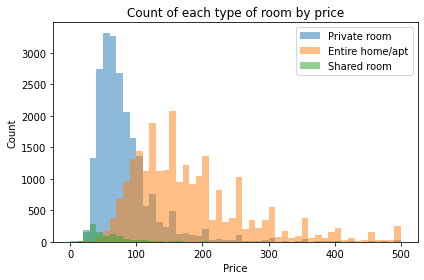

In [72]:
#visualize the categorical values for the room_type
categories = Data['room_type'].unique()
bin_range=(0,500)
for c in categories:
    plt.hist(Data[Data['room_type']==c]['price'],alpha=0.5, label=c, range=bin_range,bins=50)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Count of each type of room by price')
plt.tight_layout()
plt.savefig('Price and Count Relationship')

In [73]:
neighbourhood_group = Data['room_type'].value_counts()
neighbourhood_group

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0, 0.5, 'the percent of every room type')

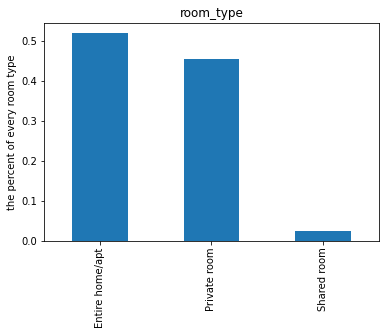

In [74]:
#visualize the categorical values for the room_type
count_room = Data.room_type.value_counts()
(count_room/Data.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

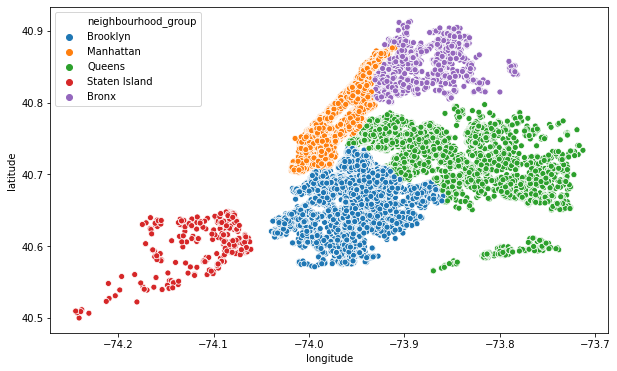

In [77]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(10,6))
sns.scatterplot(Data.longitude,Data.latitude,hue=Data.neighbourhood_group)
plt.ioff()

Visualizing the spread of differnet neighbourhood_group 

In [75]:
Data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 0, 'neighbourhood group')

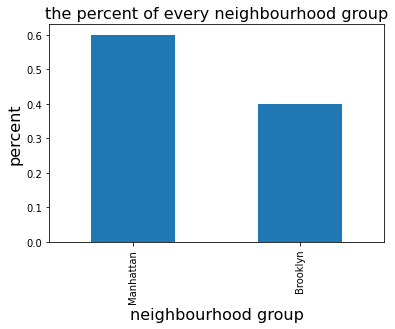

In [94]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = Data.neighbourhood_group.value_counts()
(count_neigh/Data.shape[0]).plot(kind='bar');
plt.title('the percent of every neighbourhood group', fontsize = 16)
plt.ylabel('percent', fontsize = 16)
plt.xlabel('neighbourhood group', fontsize = 16)

As per above % percent of every neighbourhood group , Manhattan & Brooklyn cover more area compare to other  
neighbourhood group.Therefore we can co-related the relationship between price and no. fo reviews in those 
neighbourhood group.